# Data Exploration
- Loaded the diabetes data set by using the csv file from Canvas.
- Conducted exploratory analysis of the dataset. Obtain aggregate statistics on each predictor variable and preprocess data appropriately. 
- Created plots to tell the story of the data: displayed the distribution of each variable and relationships between the variables.

** The data initially contained inappropriate zeros in body mass, insulin, skin, blood pressure, and blood plasma, which is needed to clean the data from zeros to NAs.**
** After data cleaning, I was able to choose which variables should be dropped before I split into test and training: skin and insulin, which were lowerest values for containing so many NAs by counting.**

In [1]:
import numpy as np
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

###### Reading a csv file into a dataframe 
- Delim_whilespace: boolean, dafault False
- If this option is set to True, nothing should be passed in for the delimiter parameter.

In [2]:
diabetes = pd.read_csv("diabetes2.csv", delim_whitespace=False) 
print diabetes.head(5) 
diabetes.describe()

   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
diabetes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [3]:
diabetes2 = diabetes.copy(deep=True) 
# use replace as pure function:
diabetes2['plas']= diabetes['plas'].replace(0,np.NaN)
diabetes2['pres'] = diabetes['pres'].replace(0,np.NaN)
diabetes2['skin'] = diabetes['skin'].replace(0,np.NaN)
diabetes2['mass'] = diabetes['mass'].replace(0,np.NaN)
diabetes2['insu'] = diabetes['insu'].replace(0,np.NaN)
# use replace as mutator by setting arg inplace=True 
print diabetes2.apply(np.nanmedian, axis = 0)
print diabetes2.info()
diabetes2.describe()

preg       3.0000
plas     117.0000
pres      72.0000
skin      29.0000
insu     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     763 non-null float64
pres     733 non-null float64
skin     541 non-null float64
insu     394 non-null float64
mass     757 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.0 KB
None


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabete_class= diabetes.groupby(['class'])
diabete_class.describe()

age                                                       insu  \
       count       mean        std   min   25%   50%   75%   max  count   
class                                                                     
0      500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0  500.0   
1      268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0  268.0   

                   ...   pres          skin                                  \
             mean  ...    75%    max  count       mean        std  min  25%   
class              ...                                                        
0       68.792000  ...   78.0  122.0  500.0  19.664000  14.889947  0.0  0.0   
1      100.335821  ...   82.0  114.0  268.0  22.164179  17.679711  0.0  0.0   

                         
        50%   75%   max  
class                    
0      21.0  31.0  60.0  
1      27.0  36.0  99.0  

[2 rows x 64 columns]

In [5]:
nullinsu = diabetes2.insu.isnull()
countNullinsu = len(nullinsu[nullinsu==True])#take slice to count how many True
print countNullinsu
diabetes2.isnull().sum(axis=0)# sum along columns

374


preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [6]:
Nullinsu = diabetes.insu.isnull()
countNullinsu = Nullinsu[nullinsu==True]
print len(countNullinsu)
meaninsu = np.mean(diabetes.insu)     #Using numpy mean function to calculate the mean value
#replacing missing values in the DataFrame
print meaninsu

374
79.7994791667


In [7]:
#Dataset with 2 extra factor variables
diabetes = pd.read_csv("diabetes2.csv") 
print diabetes.head(5) 
print diabetes.info()
diabetes.describe()

   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB
None


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabete_class= diabetes.groupby(['skin'])
diabete_class.describe()

age                                                        class  \
      count       mean        std   min    25%   50%    75%   max  count   
skin                                                                       
0     227.0  37.251101  13.062933  21.0  27.00  34.0  45.00  72.0  227.0   
7       2.0  52.000000  11.313708  44.0  48.00  52.0  56.00  60.0    2.0   
8       2.0  28.500000  10.606602  21.0  24.75  28.5  32.25  36.0    2.0   
10      5.0  22.200000   1.643168  21.0  21.00  22.0  22.00  25.0    5.0   
11      6.0  24.333333   3.669696  22.0  22.00  22.0  26.50  30.0    6.0   
12      7.0  29.571429   3.952094  24.0  28.00  29.0  30.50  37.0    7.0   
13     11.0  23.272727   1.420627  21.0  22.50  23.0  24.00  26.0   11.0   
14      6.0  23.833333   4.622409  21.0  21.25  22.0  23.50  33.0    6.0   
15     14.0  30.357143  12.382414  21.0  22.00  25.5  34.00  63.0   14.0   
16      6.0  26.166667   6.177918  21.0  22.50  24.5  26.50  38.0    6.0   
17     14.0  27.571429  10.646157  21.0  22.00  24.5  27.75  62.0   14.0   
18     20.0  31.450000  14.080502  21.0  22.00  24.5  41.50  70.0   20.0   
19     18.0  29.611111  10.885170  21.0  22.25  24.5  31.75  57.0   18.0   
20     13.0  28.615385   6.410128  21.0  23.00  28.0  32.00  42.0   13.0   
21     10.0  29.200000   8.991354  22.0  23.25  26.0  31.50  51.0   10.0   
22     16.0  27.750000   7.514431  21.0  21.75  25.0  32.25  48.0   16.0   
23     22.0  28.909091  10.573593  21.0  21.25  25.0  29.75  59.0   22.0   
24     12.0  35.000000  12.225160  21.0  25.00  31.0  44.75  54.0   12.0   
25     16.0  29.937500   8.652312  22.0  23.00  26.0  38.75  46.0   16.0   
26     16.0  36.562500  14.184352  21.0  22.75  35.5  49.25  60.0   16.0   
27     23.0  31.608696  12.127126  21.0  22.00  27.0  40.00  59.0   23.0   
28     20.0  31.000000   9.700787  21.0  23.75  26.5  39.50  51.0   20.0   
29     17.0  33.764706  11.813813  21.0  25.00  29.0  42.00  57.0   17.0   
30     27.0  31.555556   7.806966  21.0  24.50  32.0  38.00  45.0   27.0   
31     19.0  35.105263  13.286981  22.0  23.50  28.0  44.00  63.0   19.0   
32     31.0  33.000000  10.648944  21.0  25.00  30.0  38.00  58.0   31.0   
33     20.0  38.800000  14.877040  22.0  26.75  35.5  43.75  81.0   20.0   
34      8.0  35.125000  13.747078  23.0  24.00  30.0  42.50  58.0    8.0   
35     15.0  29.533333   8.500980  21.0  22.00  29.0  33.50  50.0   15.0   
36     14.0  31.928571  11.737280  21.0  23.50  28.0  36.00  60.0   14.0   
37     16.0  34.687500  12.262239  22.0  23.75  30.5  42.25  65.0   16.0   
38      7.0  30.857143   6.202918  22.0  26.50  33.0  34.50  39.0    7.0   
39     18.0  31.000000   5.573044  22.0  28.00  30.5  34.00  41.0   18.0   
40     16.0  35.312500   8.661938  22.0  28.00  38.0  42.25  48.0   16.0   
41     15.0  31.066667   7.323803  21.0  26.50  29.0  35.00  47.0   15.0   
42     11.0  28.636364   7.228731  22.0  23.50  26.0  32.00  42.0   11.0   
43      6.0  36.166667  14.483324  22.0  26.50  30.5  45.75  58.0    6.0   
44      5.0  32.400000   6.228965  26.0  26.00  34.0  36.00  40.0    5.0   
45      6.0  31.666667  11.111556  24.0  24.50  27.5  32.75  53.0    6.0   
46      8.0  30.875000  10.343217  21.0  23.25  26.0  40.75  46.0    8.0   
47      4.0  35.250000  14.056434  25.0  28.00  30.0  37.25  56.0    4.0   
48      4.0  45.000000  16.083117  25.0  37.00  46.0  54.00  63.0    4.0   
49      3.0  34.333333   7.767453  28.0  30.00  32.0  37.50  43.0    3.0   
50      3.0  23.000000   1.732051  21.0  22.50  24.0  24.00  24.0    3.0   
51      1.0  31.000000        NaN  31.0  31.00  31.0  31.00  31.0    1.0   
52      2.0  27.000000   2.828427  25.0  26.00  27.0  28.00  29.0    2.0   
54      2.0  34.500000  14.849242  24.0  29.25  34.5  39.75  45.0    2.0   
56      1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0    1.0   
60      1.0  31.000000        NaN  31.0  31.00  31.0  31.00  31.0    1.0   
63      1.0  25.000000        NaN  25.0  25.00  25.0  25

In [9]:
diabete_class= diabetes.groupby(['plas'])
diabete_class.describe()

age                                                       class  \
     count       mean        std   min    25%   50%    75%   max count   
plas                                                                     
0      5.0  28.600000   9.607289  21.0  22.00  22.0  37.00  41.0   5.0   
44     1.0  36.000000        NaN  36.0  36.00  36.0  36.00  36.0   1.0   
56     1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0   1.0   
57     2.0  54.000000  18.384776  41.0  47.50  54.0  60.50  67.0   2.0   
61     1.0  46.000000        NaN  46.0  46.00  46.0  46.00  46.0   1.0   
62     1.0  41.000000        NaN  41.0  41.00  41.0  41.00  41.0   1.0   
65     1.0  42.000000        NaN  42.0  42.00  42.0  42.00  42.0   1.0   
67     1.0  46.000000        NaN  46.0  46.00  46.0  46.00  46.0   1.0   
68     3.0  31.666667  13.316656  23.0  24.00  25.0  36.00  47.0   3.0   
71     4.0  22.750000   2.217356  21.0  21.75  22.0  23.00  26.0   4.0   
72     1.0  38.000000        NaN  38.0  38.00  38.0  38.00  38.0   1.0   
73     3.0  24.333333   3.055050  21.0  23.00  25.0  26.00  27.0   3.0   
74     4.0  26.500000   8.346656  22.0  22.00  22.5  27.00  39.0   4.0   
75     2.0  35.500000   3.535534  33.0  34.25  35.5  36.75  38.0   2.0   
76     2.0  33.000000  11.313708  25.0  29.00  33.0  37.00  41.0   2.0   
77     2.0  29.500000   7.778175  24.0  26.75  29.5  32.25  35.0   2.0   
78     4.0  27.750000   7.804913  21.0  24.00  25.5  29.25  39.0   4.0   
79     3.0  22.333333   0.577350  22.0  22.00  22.0  22.50  23.0   3.0   
80     6.0  26.833333   7.521081  21.0  22.00  24.5  27.75  41.0   6.0   
81     6.0  28.333333   7.501111  22.0  24.25  25.0  30.25  42.0   6.0   
82     3.0  24.333333   1.154701  23.0  24.00  25.0  25.00  25.0   3.0   
83     6.0  28.000000   5.692100  22.0  24.25  26.0  32.25  36.0   6.0   
84    10.0  27.700000   8.393781  21.0  21.50  25.0  28.00  46.0  10.0   
85     7.0  33.857143   6.148945  27.0  29.50  32.0  38.50  42.0   7.0   
86     3.0  26.000000   2.645751  24.0  24.50  25.0  27.00  29.0   3.0   
87     7.0  24.428571   3.690399  21.0  22.00  24.0  25.00  32.0   7.0   
88     9.0  28.777778   8.786037  22.0  22.00  26.0  30.00  48.0   9.0   
89     6.0  29.666667   9.244818  21.0  21.50  28.0  36.75  42.0   6.0   
90    11.0  29.090909   9.904085  21.0  24.00  25.0  30.00  56.0  11.0   
91     9.0  33.000000  17.464249  21.0  22.00  25.0  31.00  68.0   9.0   
...    ...        ...        ...   ...    ...   ...    ...   ...   ...   
168    4.0  41.750000   7.500000  34.0  38.50  40.5  43.75  52.0   4.0   
169    1.0  31.000000        NaN  31.0  31.00  31.0  31.00  31.0   1.0   
170    2.0  36.500000   9.192388  30.0  33.25  36.5  39.75  43.0   2.0   
171    3.0  34.666667  16.772994  24.0  25.00  26.0  40.00  54.0   3.0   
172    1.0  28.000000        NaN  28.0  28.00  28.0  28.00  28.0   1.0   
173    6.0  34.500000  12.849124  22.0  26.50  32.0  36.75  58.0   6.0   
174    2.0  30.000000   8.485281  24.0  27.00  30.0  33.00  36.0   2.0   
175    2.0  30.000000  11.313708  22.0  26.00  30.0  34.00  38.0   2.0   
176    2.0  55.000000   4.242641  52.0  53.50  55.0  56.50  58.0   2.0   
177    1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0   1.0   
178    1.0  41.000000        NaN  41.0  41.00  41.0  41.00  41.0   1.0   
179    5.0  35.600000  15.339492  22.0  23.00  36.0  37.00  60.0   5.0   
180    5.0  30.400000   7.266361  25.0  25.00  26.0  35.00  41.0   5.0   
181    5.0  39.400000  16.149303  22.0  26.00  38.0  51.00  60.0   5.0   
182    1.0  29.000000        NaN  29.0  29.00  29.0  29.00  29.0   1.0   
183    3.0  37.666667   6.658328  32.0  34.00  36.0  40.50  45.0   3.0   
184    3.0  40.333333   9.018500  31.0  36.00  41.0  45.00  49.0   3.0   
186    1.0  37.000000        NaN  37.0  37.00  37.0  37.00  37.0   1.0   
187    4.0  41.000000   8.524475  34.0  35.50  38.5  44.00  53.0   4.0   
188    2.0  32.500000  14.849242  22.0  27.25  32.5  37.75  43.0   2.0   
189    4.0 

In [10]:
diabete_class= diabetes.groupby(['pres'])
diabete_class.describe()

age                                                       class  \
     count       mean        std   min    25%   50%    75%   max count   
pres                                                                     
0     35.0  30.714286   9.820661  21.0  24.50  28.0  34.00  72.0  35.0   
24     1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0   1.0   
30     2.0  29.500000   4.949747  26.0  27.75  29.5  31.25  33.0   2.0   
38     1.0  26.000000        NaN  26.0  26.00  26.0  26.00  26.0   1.0   
40     1.0  33.000000        NaN  33.0  33.00  33.0  33.00  33.0   1.0   
44     4.0  27.000000   5.597619  22.0  24.25  25.5  28.25  35.0   4.0   
46     2.0  22.000000   0.000000  22.0  22.00  22.0  22.00  22.0   2.0   
48     5.0  23.800000   1.788854  22.0  22.00  24.0  25.00  26.0   5.0   
50    13.0  29.000000  11.583034  21.0  23.00  26.0  29.00  65.0  13.0   
52    11.0  25.181818   5.980271  21.0  22.00  24.0  25.00  42.0  11.0   
54    11.0  29.181818  11.948374  22.0  23.50  24.0  28.50  62.0  11.0   
55     2.0  31.500000  14.849242  21.0  26.25  31.5  36.75  42.0   2.0   
56    12.0  26.000000   5.672902  21.0  22.00  23.5  29.25  39.0  12.0   
58    21.0  25.523810   5.895923  21.0  22.00  24.0  25.00  43.0  21.0   
60    37.0  29.135135  11.754815  21.0  22.00  25.0  31.00  67.0  37.0   
61     1.0  55.000000        NaN  55.0  55.00  55.0  55.00  55.0   1.0   
62    34.0  28.617647   8.205743  21.0  23.00  25.0  32.50  50.0  34.0   
64    43.0  26.139535   5.970489  21.0  21.00  24.0  29.50  41.0  43.0   
65     7.0  26.571429   5.682052  21.0  23.00  24.0  29.00  37.0   7.0   
66    30.0  29.900000   7.540008  21.0  22.50  28.5  35.25  42.0  30.0   
68    45.0  31.555556   9.675545  21.0  25.00  28.0  36.00  60.0  45.0   
70    57.0  31.982456  10.522919  21.0  23.00  29.0  37.00  63.0  57.0   
72    44.0  37.295455  11.702871  21.0  27.00  35.0  46.25  60.0  44.0   
74    52.0  35.500000  11.578377  21.0  27.75  32.5  40.25  81.0  52.0   
75     8.0  33.250000  15.021413  21.0  21.75  28.5  37.25  60.0   8.0   
76    39.0  35.410256  12.169241  21.0  26.00  29.0  45.00  63.0  39.0   
78    45.0  39.088889  12.926052  21.0  29.00  38.0  45.00  67.0  45.0   
80    40.0  35.650000  13.070911  21.0  26.00  29.5  44.00  69.0  40.0   
82    30.0  39.466667  15.080779  21.0  27.00  37.0  49.00  70.0  30.0   
84    23.0  38.565217  12.127452  22.0  29.50  37.0  48.00  62.0  23.0   
85     6.0  36.833333  13.847984  24.0  24.75  34.0  47.00  56.0   6.0   
86    21.0  34.190476  12.890380  21.0  23.00  29.0  42.00  63.0  21.0   
88    25.0  35.440000  11.254925  21.0  27.00  32.0  40.00  66.0  25.0   
90    22.0  38.136364  12.740245  21.0  28.25  38.0  43.00  66.0  22.0   
92     8.0  44.625000  14.725464  28.0  31.50  43.0  55.75  66.0   8.0   
94     6.0  39.833333  10.590877  26.0  31.50  45.0  45.00  51.0   6.0   
95     1.0  60.000000        NaN  60.0  60.00  60.0  60.00  60.0   1.0   
96     4.0  31.500000  15.588457  21.0  21.00  25.5  36.00  54.0   4.0   
98     3.0  31.666667   3.214550  28.0  30.50  33.0  33.50  34.0   3.0   
100    3.0  34.000000  11.532563  22.0  28.50  35.0  40.00  45.0   3.0   
102    1.0  45.000000        NaN  45.0  45.00  45.0  45.00  45.0   1.0   
104    2.0  46.500000   7.778175  41.0  43.75  46.5  49.25  52.0   2.0   
106    3.0  47.000000   4.000000  43.0  45.00  47.0  49.00  51.0   3.0   
108    2.0  51.000000  19.798990  37.0  44.00  51.0  58.00  65.0   2.0   
110    3.0  39.000000  14.106736  26.0  31.50  37.0  45.50  54.0   3.0   
114    1.0  44.000000        NaN  44.0  44.00  44.0  44.00  44.0   1.0   
122    1.0  27.000000        NaN  27.0  27.00  27.0  27.00  27.0   1.0   

                ...    preg        skin                                     \
          mean  ...     75%   max count       mean        std   min    25%   
pres            ...                                                          
0     0.457143  ...    6.00  13.0  35.0   1.514286   6.298326   0.0   0.

In [39]:
diabete_class= diabetes.groupby(['mass'])
diabete_class.describe()

age                                                       class  \
     count       mean        std   min    25%   50%    75%   max count   
mass                                                                     
0.0   11.0  30.454545  15.945931  21.0  21.50  24.0  28.00  69.0  11.0   
18.2   3.0  23.000000   3.464102  21.0  21.00  21.0  24.00  27.0   3.0   
18.4   1.0  27.000000        NaN  27.0  27.00  27.0  27.00  27.0   1.0   
19.1   1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0   1.0   
19.3   1.0  30.000000        NaN  30.0  30.00  30.0  30.00  30.0   1.0   
19.4   1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0   1.0   
19.5   2.0  26.500000   2.121320  25.0  25.75  26.5  27.25  28.0   2.0   
19.6   3.0  52.333333  24.419937  25.0  42.50  60.0  66.00  72.0   3.0   
19.9   1.0  28.000000        NaN  28.0  28.00  28.0  28.00  28.0   1.0   
20.0   1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0   1.0   
20.1   1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0   1.0   
20.4   2.0  24.500000   3.535534  22.0  23.25  24.5  25.75  27.0   2.0   
20.8   2.0  37.000000  15.556349  26.0  31.50  37.0  42.50  48.0   2.0   
21.0   2.0  29.000000  11.313708  21.0  25.00  29.0  33.00  37.0   2.0   
21.1   4.0  32.750000  14.840822  25.0  25.00  25.5  33.25  55.0   4.0   
21.2   1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0   1.0   
21.7   1.0  67.000000        NaN  67.0  67.00  67.0  67.00  67.0   1.0   
21.8   5.0  23.200000   2.588436  21.0  21.00  22.0  26.00  26.0   5.0   
21.9   3.0  42.333333  20.526406  25.0  31.00  37.0  51.00  65.0   3.0   
22.1   2.0  29.000000  11.313708  21.0  25.00  29.0  33.00  37.0   2.0   
22.2   2.0  40.000000  24.041631  23.0  31.50  40.0  48.50  57.0   2.0   
22.3   1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0   1.0   
22.4   2.0  24.500000   3.535534  22.0  23.25  24.5  25.75  27.0   2.0   
22.5   3.0  25.333333   6.658328  21.0  21.50  22.0  27.50  33.0   3.0   
22.6   2.0  21.000000   0.000000  21.0  21.00  21.0  21.00  21.0   2.0   
22.7   1.0  48.000000        NaN  48.0  48.00  48.0  48.00  48.0   1.0   
22.9   2.0  22.500000   0.707107  22.0  22.25  22.5  22.75  23.0   2.0   
23.0   2.0  30.500000  13.435029  21.0  25.75  30.5  35.25  40.0   2.0   
23.1   4.0  37.500000  16.196707  22.0  25.00  36.0  48.50  56.0   4.0   
23.2   3.0  25.000000   6.082763  21.0  21.50  22.0  27.00  32.0   3.0   
...    ...        ...        ...   ...    ...   ...    ...   ...   ...   
44.5   2.0  25.000000   1.414214  24.0  24.50  25.0  25.50  26.0   2.0   
44.6   1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0   1.0   
45.0   1.0  47.000000        NaN  47.0  47.00  47.0  47.00  47.0   1.0   
45.2   1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0   1.0   
45.3   3.0  32.000000  12.165525  24.0  25.00  26.0  36.00  46.0   3.0   
45.4   1.0  54.000000        NaN  54.0  54.00  54.0  54.00  54.0   1.0   
45.5   1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0   1.0   
45.6   2.0  33.500000   6.363961  29.0  31.25  33.5  35.75  38.0   2.0   
45.7   1.0  27.000000        NaN  27.0  27.00  27.0  27.00  27.0   1.0   
45.8   1.0  31.000000        NaN  31.0  31.00  31.0  31.00  31.0   1.0   
46.1   2.0  36.500000  13.435029  27.0  31.75  36.5  41.25  46.0   2.0   
46.2   2.0  44.000000   2.828427  42.0  43.00  44.0  45.00  46.0   2.0   
46.3   1.0  32.000000        NaN  32.0  32.00  32.0  32.00  32.0   1.0   
46.5   1.0  58.000000        NaN  58.0  58.00  58.0  58.00  58.0   1.0   
46.7   1.0  42.000000        NaN  42.0  42.00  42.0  42.00  42.0   1.0   
46.8   2.0  38.000000   9.899495  31.0  34.50  38.0  41.50  45.0   2.0   
47.9   2.0  34.500000  12.020815  26.0  30.25  34.5  38.75  43.0   2.0   
48.3   1.0  32.000000        NaN  32.0  32.00  32.0  32.00  32.0   1.0   
48.8   1.0  37.000000        NaN  37.0  37.00  37.0  37.00  37.0   1.0   
49.3   1.0  27.000000        NaN  27.0  27.00  27.0  27.00  27.0   1.0   
49.6   1.0 

In [12]:
diabete_class= diabetes.groupby(['insu'])
diabete_class.describe()

age                                                        class  \
      count       mean        std   min    25%   50%    75%   max  count   
insu                                                                       
0     374.0  35.796791  12.729034  21.0  25.00  32.0  43.00  72.0  374.0   
14      1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0    1.0   
15      1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0    1.0   
16      1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0    1.0   
18      2.0  23.000000   2.828427  21.0  22.00  23.0  24.00  25.0    2.0   
22      1.0  40.000000        NaN  40.0  40.00  40.0  40.00  40.0    1.0   
23      2.0  25.500000   6.363961  21.0  23.25  25.5  27.75  30.0    2.0   
25      1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0    1.0   
29      1.0  43.000000        NaN  43.0  43.00  43.0  43.00  43.0    1.0   
32      1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0    1.0   
36      3.0  24.000000   2.000000  22.0  23.00  24.0  25.00  26.0    3.0   
37      2.0  22.500000   0.707107  22.0  22.25  22.5  22.75  23.0    2.0   
38      1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0    1.0   
40      2.0  22.500000   2.121320  21.0  21.75  22.5  23.25  24.0    2.0   
41      1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0    1.0   
42      1.0  35.000000        NaN  35.0  35.00  35.0  35.00  35.0    1.0   
43      1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0    1.0   
44      3.0  24.000000   2.645751  22.0  22.50  23.0  25.00  27.0    3.0   
45      3.0  22.000000   1.000000  21.0  21.50  22.0  22.50  23.0    3.0   
46      1.0  28.000000        NaN  28.0  28.00  28.0  28.00  28.0    1.0   
48      3.0  29.333333  10.969655  23.0  23.00  23.0  32.50  42.0    3.0   
49      5.0  33.200000   9.418068  26.0  26.00  28.0  39.00  47.0    5.0   
50      3.0  22.333333   1.527525  21.0  21.50  22.0  23.00  24.0    3.0   
51      1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0    1.0   
52      1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0    1.0   
53      2.0  23.000000   1.414214  22.0  22.50  23.0  23.50  24.0    2.0   
54      4.0  32.750000  10.996211  22.0  27.25  30.5  36.00  48.0    4.0   
55      2.0  28.500000   6.363961  24.0  26.25  28.5  30.75  33.0    2.0   
56      5.0  28.800000  10.894953  21.0  24.00  25.0  26.00  48.0    5.0   
57      2.0  28.500000   4.949747  25.0  26.75  28.5  30.25  32.0    2.0   
...     ...        ...        ...   ...    ...   ...    ...   ...    ...   
321     1.0  40.000000        NaN  40.0  40.00  40.0  40.00  40.0    1.0   
325     3.0  38.333333  17.039171  28.0  28.50  29.0  43.50  58.0    3.0   
326     1.0  60.000000        NaN  60.0  60.00  60.0  60.00  60.0    1.0   
328     1.0  35.000000        NaN  35.0  35.00  35.0  35.00  35.0    1.0   
330     1.0  23.000000        NaN  23.0  23.00  23.0  23.00  23.0    1.0   
335     1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0    1.0   
342     1.0  42.000000        NaN  42.0  42.00  42.0  42.00  42.0    1.0   
360     1.0  29.000000        NaN  29.0  29.00  29.0  29.00  29.0    1.0   
370     1.0  46.000000        NaN  46.0  46.00  46.0  46.00  46.0    1.0   
375     1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0    1.0   
387     1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0    1.0   
392     1.0  34.000000        NaN  34.0  34.00  34.0  34.00  34.0    1.0   
402     1.0  34.000000        NaN  34.0  34.00  34.0  34.00  34.0    1.0   
415     1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0    1.0   
440     1.0  30.000000        NaN  30.0  30.00  30.0  30.00  30.0    1.0   
465     1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0    1.0   
474     1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0    1.0   
478     1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0    1.0   
480     2.0  32.000000  15.556349  21.0  26.50  32.0  37

In [13]:
%matplotlib inline

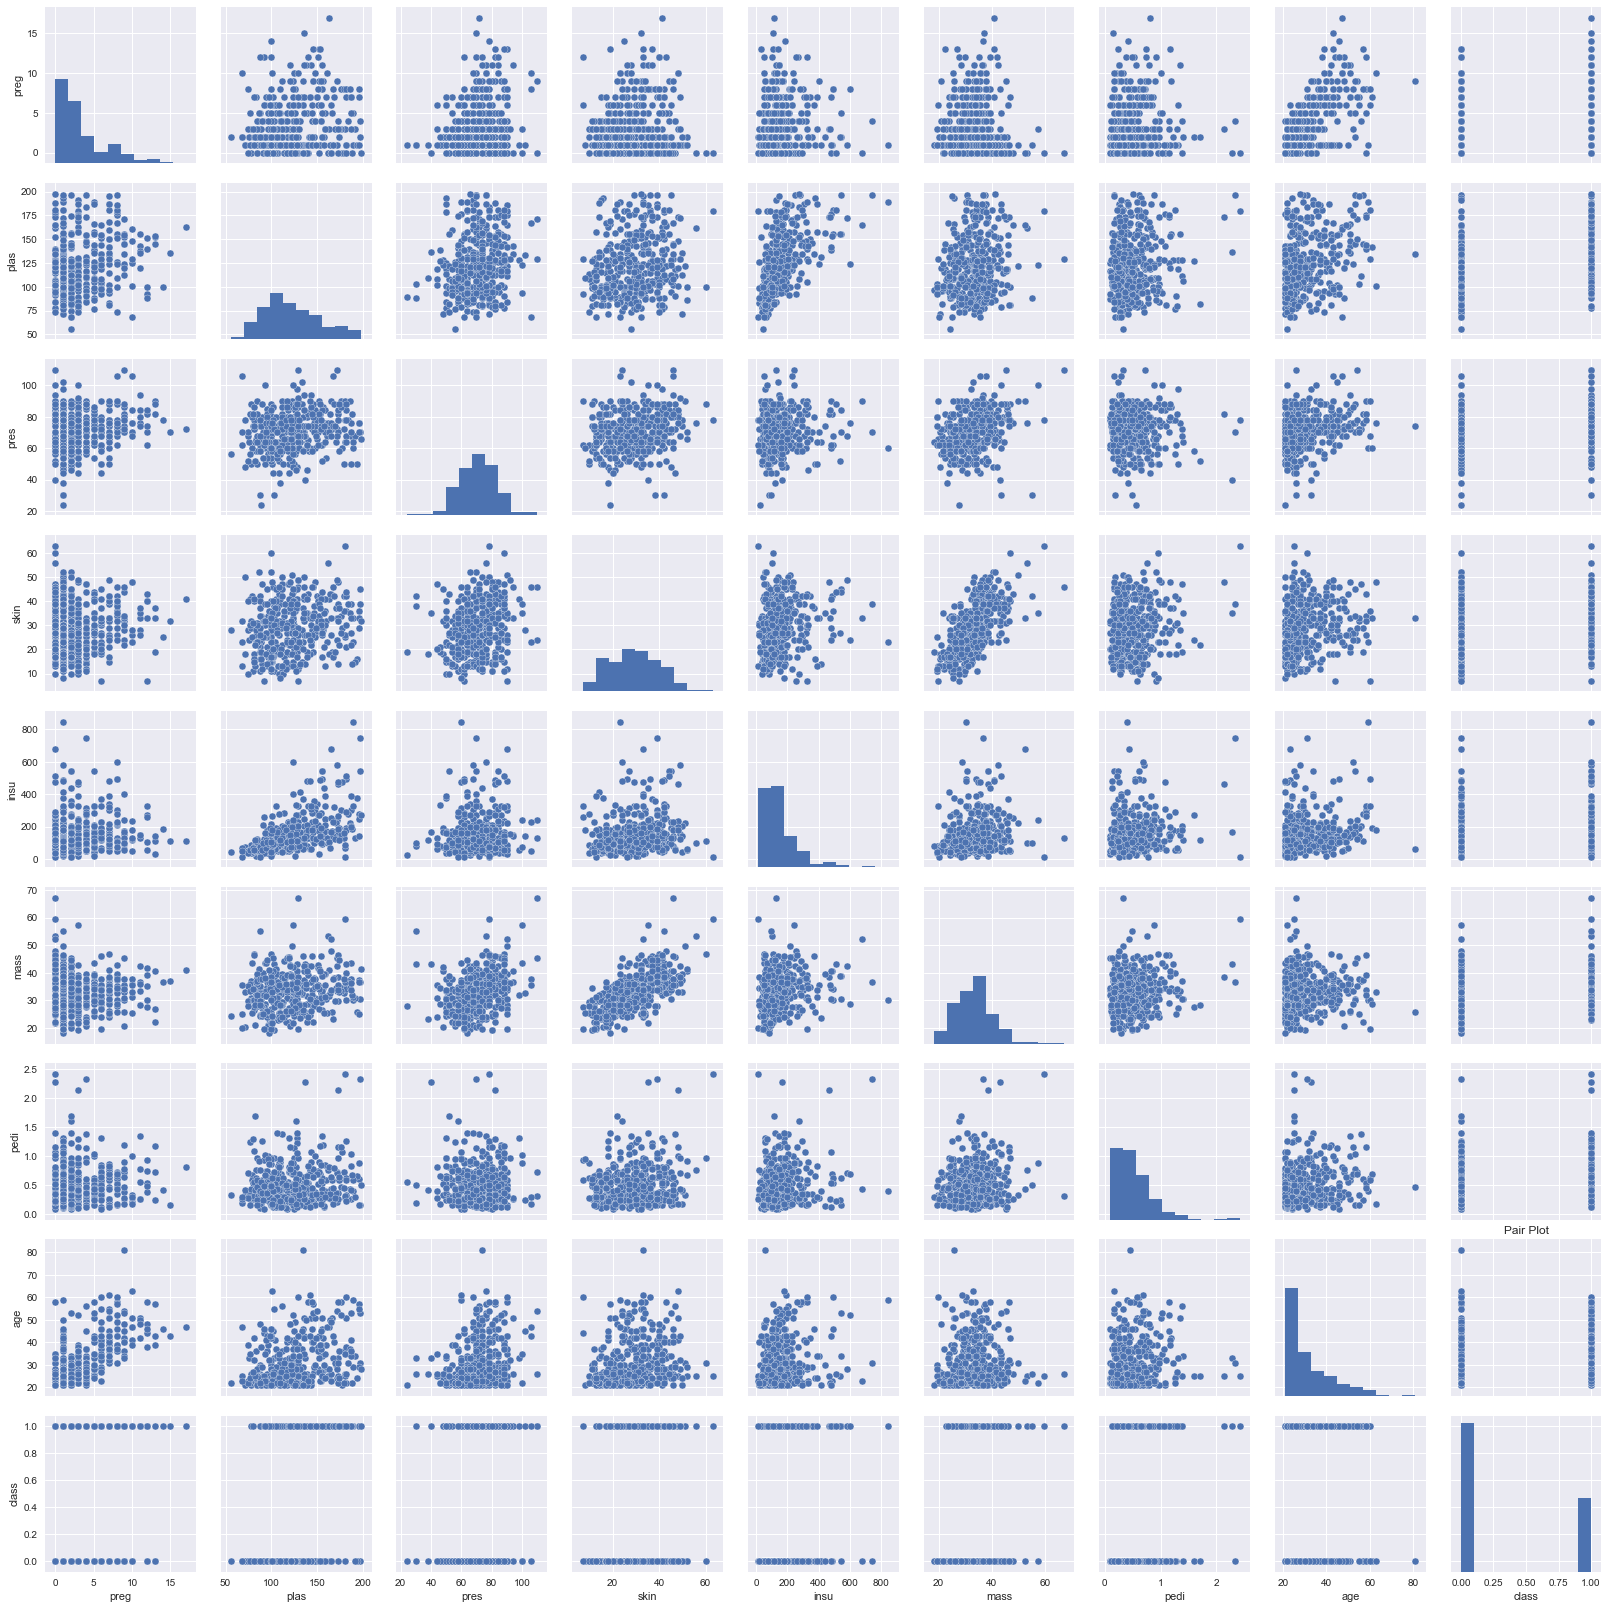

In [14]:
plot_diabetes = diabetes2.dropna()
sns.pairplot(plot_diabetes)
plt.title("Pair Plot")
plt.show()

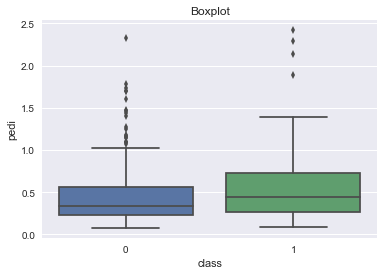

In [15]:
sns.boxplot(x="class", y="pedi", data=diabetes2)
plt.title("Boxplot")
plt.show()

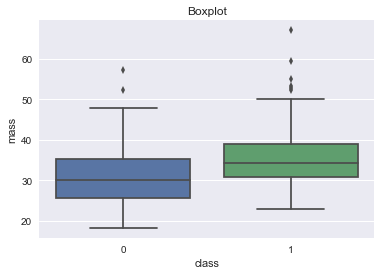

In [16]:
sns.boxplot(x="class", y="mass", data=diabetes2)
plt.title("Boxplot")
plt.show()

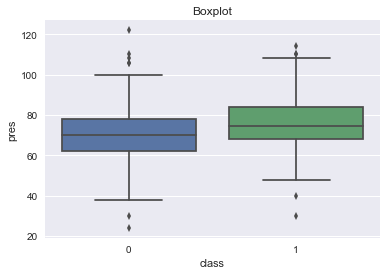

In [17]:
sns.boxplot(x="class", y="pres", data=diabetes2)
plt.title("Boxplot")
plt.show()

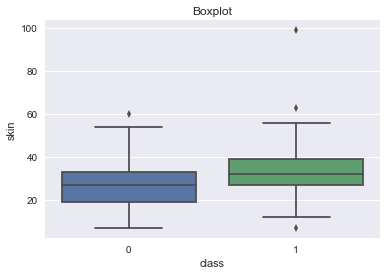

In [18]:
sns.boxplot(x="class", y="skin", data=diabetes2)
plt.title("Boxplot")
plt.show()

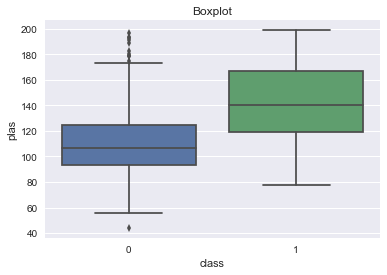

In [19]:
sns.boxplot(x="class", y="plas", data=diabetes2)
plt.title("Boxplot")
plt.show()

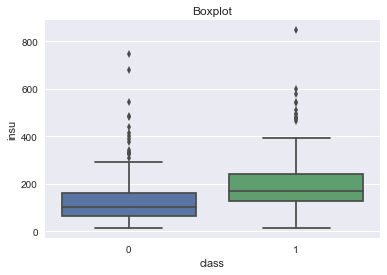

In [20]:
sns.boxplot(x="class", y="insu", data=diabetes2)
plt.title("Boxplot")
plt.show()

<b>Use distplot() for a quick view of a univariate distribution.<br> 
By default, this will draw a histogram and fit a kernel density estimate (KDE).<br>
Notice the y axis can be counts or density of observations.</b><br>
See https://seaborn.pydata.org/tutorial/distributions.html

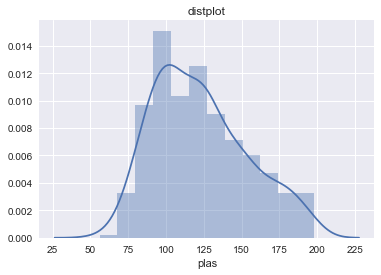

In [22]:
sns.distplot(plot_diabetes.plas)
plt.title("distplot")
plt.show()

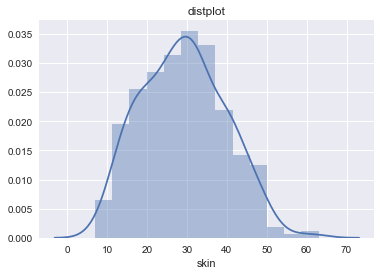

In [23]:
sns.distplot(plot_diabetes.skin)
plt.title("distplot")
plt.show()

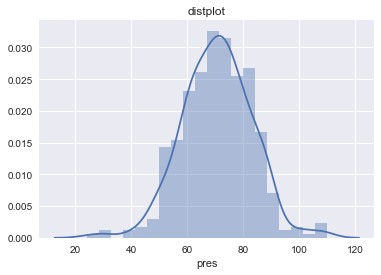

In [24]:
sns.distplot(plot_diabetes.pres)
plt.title("distplot")
plt.show()

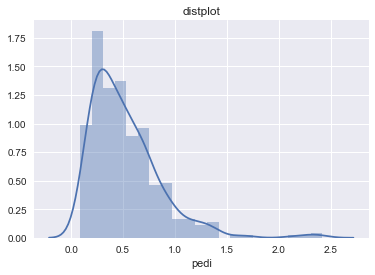

In [25]:
sns.distplot(plot_diabetes.pedi)
plt.title("distplot")
plt.show()

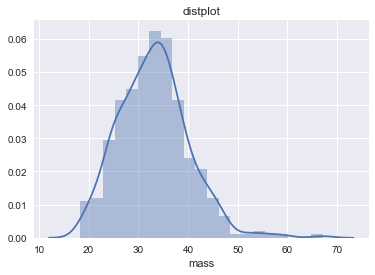

In [26]:
sns.distplot(plot_diabetes.mass)
plt.title("distplot")
plt.show()

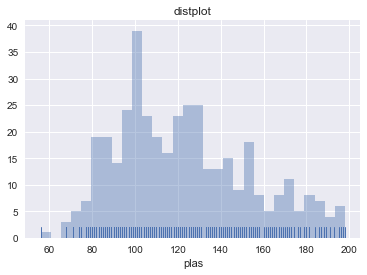

In [27]:
sns.distplot(plot_diabetes.plas, bins= 30, kde=False, rug=True)
plt.title("distplot")
plt.show()

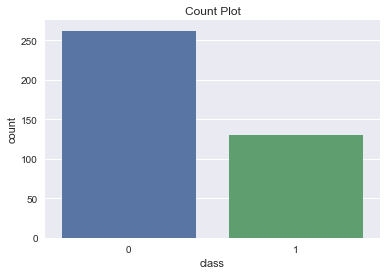

In [29]:
sns.countplot(x="class", data= plot_diabetes)
plt.title("Count Plot")
plt.show()

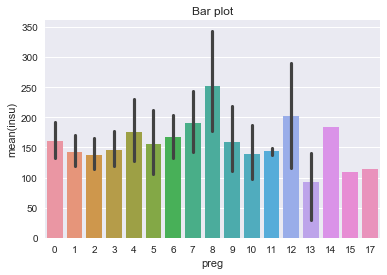

In [30]:
sns.barplot(x="preg",   y="insu", data=plot_diabetes)
plt.title("Bar plot")
plt.show()

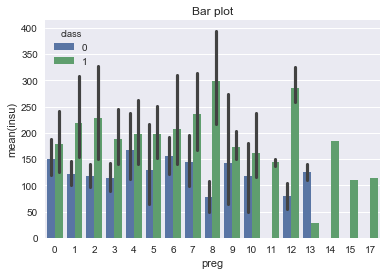

In [32]:
sns.barplot(x="preg",   y="insu", hue="class", data=plot_diabetes)
plt.title("Bar plot")
plt.show()

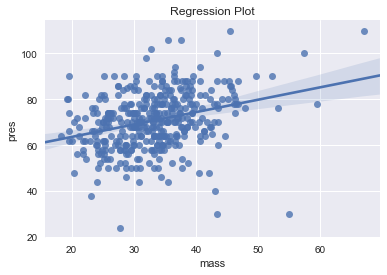

In [33]:
sns.regplot(x="mass", y="pres", data=plot_diabetes)  ###########################
plt.title("Regression Plot")
plt.show()

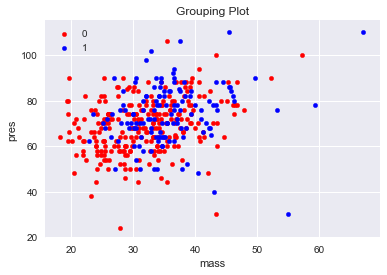

In [34]:
fig, ax = plt.subplots()
colors =   {0:'red', 1:'blue'} 
grouped = plot_diabetes.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='mass', y='pres', label=key, color=colors[key])
plt.title("Grouping Plot")
plt.show()

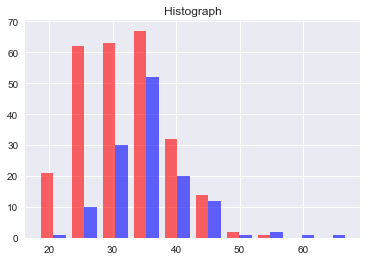

In [36]:
plt.hist([plot_diabetes["mass"][plot_diabetes["class"]==0],plot_diabetes["mass"][plot_diabetes["class"]==1]], color=['r','b'], alpha=0.6)
plt.title("Histograph")
plt.show()

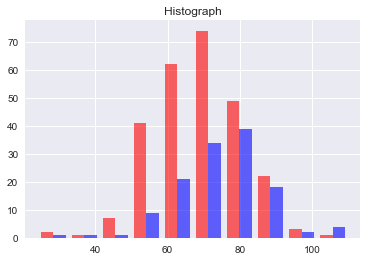

In [38]:
plt.hist([plot_diabetes["pres"][plot_diabetes["class"]==0],plot_diabetes["pres"][plot_diabetes["class"]==1]], color=['r','b'], alpha=0.6)
plt.title("Histograph")
plt.show()

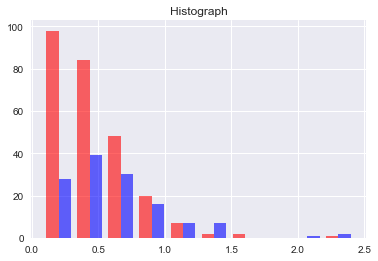

In [37]:
plt.hist([plot_diabetes["pedi"][plot_diabetes["class"]==0],plot_diabetes["pedi"][plot_diabetes["class"]==1]], color=['r','b'], alpha=0.6)
plt.title("Histograph")
plt.show()